Acoustic Extinguisher Fire Dataset

---



Importing Requisite Libraries

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity = 'all'

import warnings
warnings.filterwarnings('ignore')

%config InlineBackend.figure_format='retina'

Loading the dataset

In [2]:
df = pd.read_excel(r"/content/drive/MyDrive/dataset/Acoustic_Extinguisher_Fire_Dataset.xlsx")

In [3]:
df.head()

SIZE      FUEL  DISTANCE  DESIBEL  AIRFLOW  FREQUENCY  STATUS
0     1  gasoline        10       96      0.0         75       0
1     1  gasoline        10       96      0.0         72       1
2     1  gasoline        10       96      2.6         70       1
3     1  gasoline        10       96      3.2         68       1
4     1  gasoline        10      109      4.5         67       1

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17442 entries, 0 to 17441
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SIZE       17442 non-null  int64  
 1   FUEL       17442 non-null  object 
 2   DISTANCE   17442 non-null  int64  
 3   DESIBEL    17442 non-null  int64  
 4   AIRFLOW    17442 non-null  float64
 5   FREQUENCY  17442 non-null  int64  
 6   STATUS     17442 non-null  int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 954.0+ KB


In [5]:
df.shape

(17442, 7)

In [148]:
df.STATUS.value_counts()
# STATUS (0, 1)
# 0 indicates the non-extinction state, 1 indicates the extinction state

0    8759
1    8683
Name: STATUS, dtype: int64

# UNIVARIATE ANALYSIS

In [6]:
df.describe() # describe the data

SIZE      DISTANCE       DESIBEL       AIRFLOW     FREQUENCY  \
count  17442.000000  17442.000000  17442.000000  17442.000000  17442.000000   
mean       3.411765    100.000000     96.379142      6.975634     31.611111   
std        1.750977     54.773826      8.164096      4.736169     20.939149   
min        1.000000     10.000000     72.000000      0.000000      1.000000   
25%        2.000000     50.000000     90.000000      3.200000     14.000000   
50%        3.000000    100.000000     95.000000      5.800000     27.500000   
75%        5.000000    150.000000    104.000000     11.200000     47.000000   
max        7.000000    190.000000    113.000000     17.000000     75.000000   

             STATUS  
count  17442.000000  
mean       0.497821  
std        0.500010  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        1.000000  
max        1.000000

In [7]:
#The 'FUEL' column is missing, we have to include it.
df.describe(include=['object'])

FUEL
count      17442
unique         4
top     gasoline
freq        5130

<Figure size 300x300 with 0 Axes>

<Axes: xlabel='AIRFLOW', ylabel='Count'>

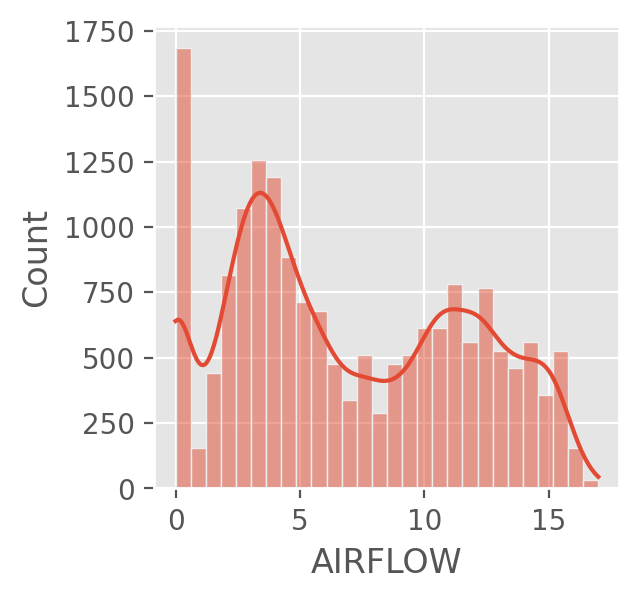

In [8]:
#Plotting the continuous column using Distribution Plot
plt.figure(figsize=(3,3))
plt.style.use('ggplot')
sns.histplot(df.AIRFLOW, kde=True)

When the airflow is more the flame is in extinction state.

In [9]:
#Plotting the categorical variables
df['FUEL'].value_counts()

gasoline    5130
thinner     5130
kerosene    5130
lpg         2052
Name: FUEL, dtype: int64

<Figure size 400x300 with 0 Axes>

<Axes: xlabel='FUEL', ylabel='Count'>

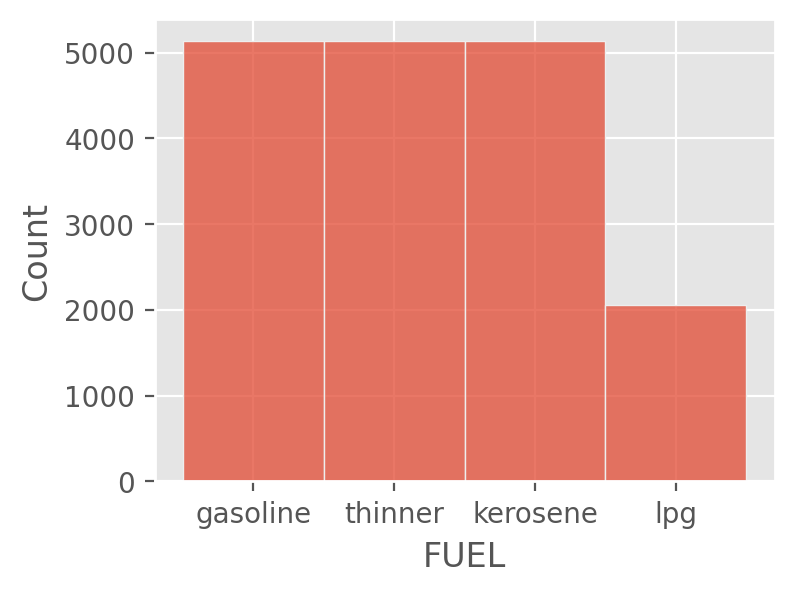

In [10]:
plt.figure(figsize=(4,3))
sns.histplot(df.FUEL)

LPG is used very less in the dataset compared to other fuels.

# BIVARIATE ANALYSIS

<Figure size 300x300 with 0 Axes>

<Axes: xlabel='STATUS', ylabel='AIRFLOW'>

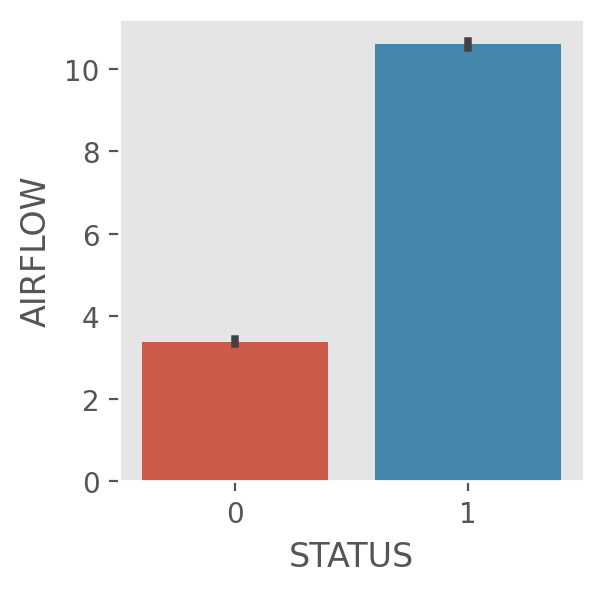

In [11]:
plt.figure(figsize=(3,3))
plt.grid(False)
sns.barplot(x =df.STATUS, y = df.AIRFLOW)

If airflow is more then the Extinction status of the flame is 0 (Non-Extinct) and If airflow is less then the Extinction status of the flame is 1 (Extinct).

<Figure size 300x300 with 0 Axes>

<Axes: xlabel='SIZE', ylabel='FUEL'>

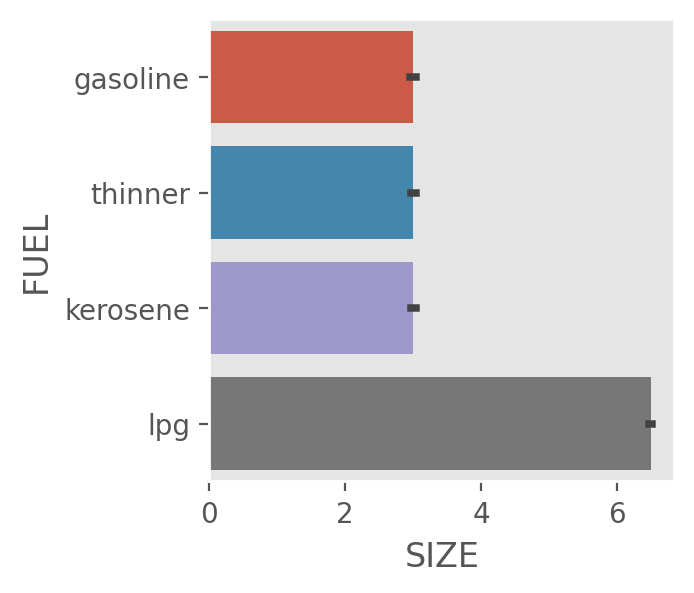

In [12]:
plt.figure(figsize=(3,3))
plt.grid(False)
sns.barplot(x = df.SIZE, y = df.FUEL)

The flame size of LPG is comparatively higher.

# MULTIVARIATE ANALYSIS

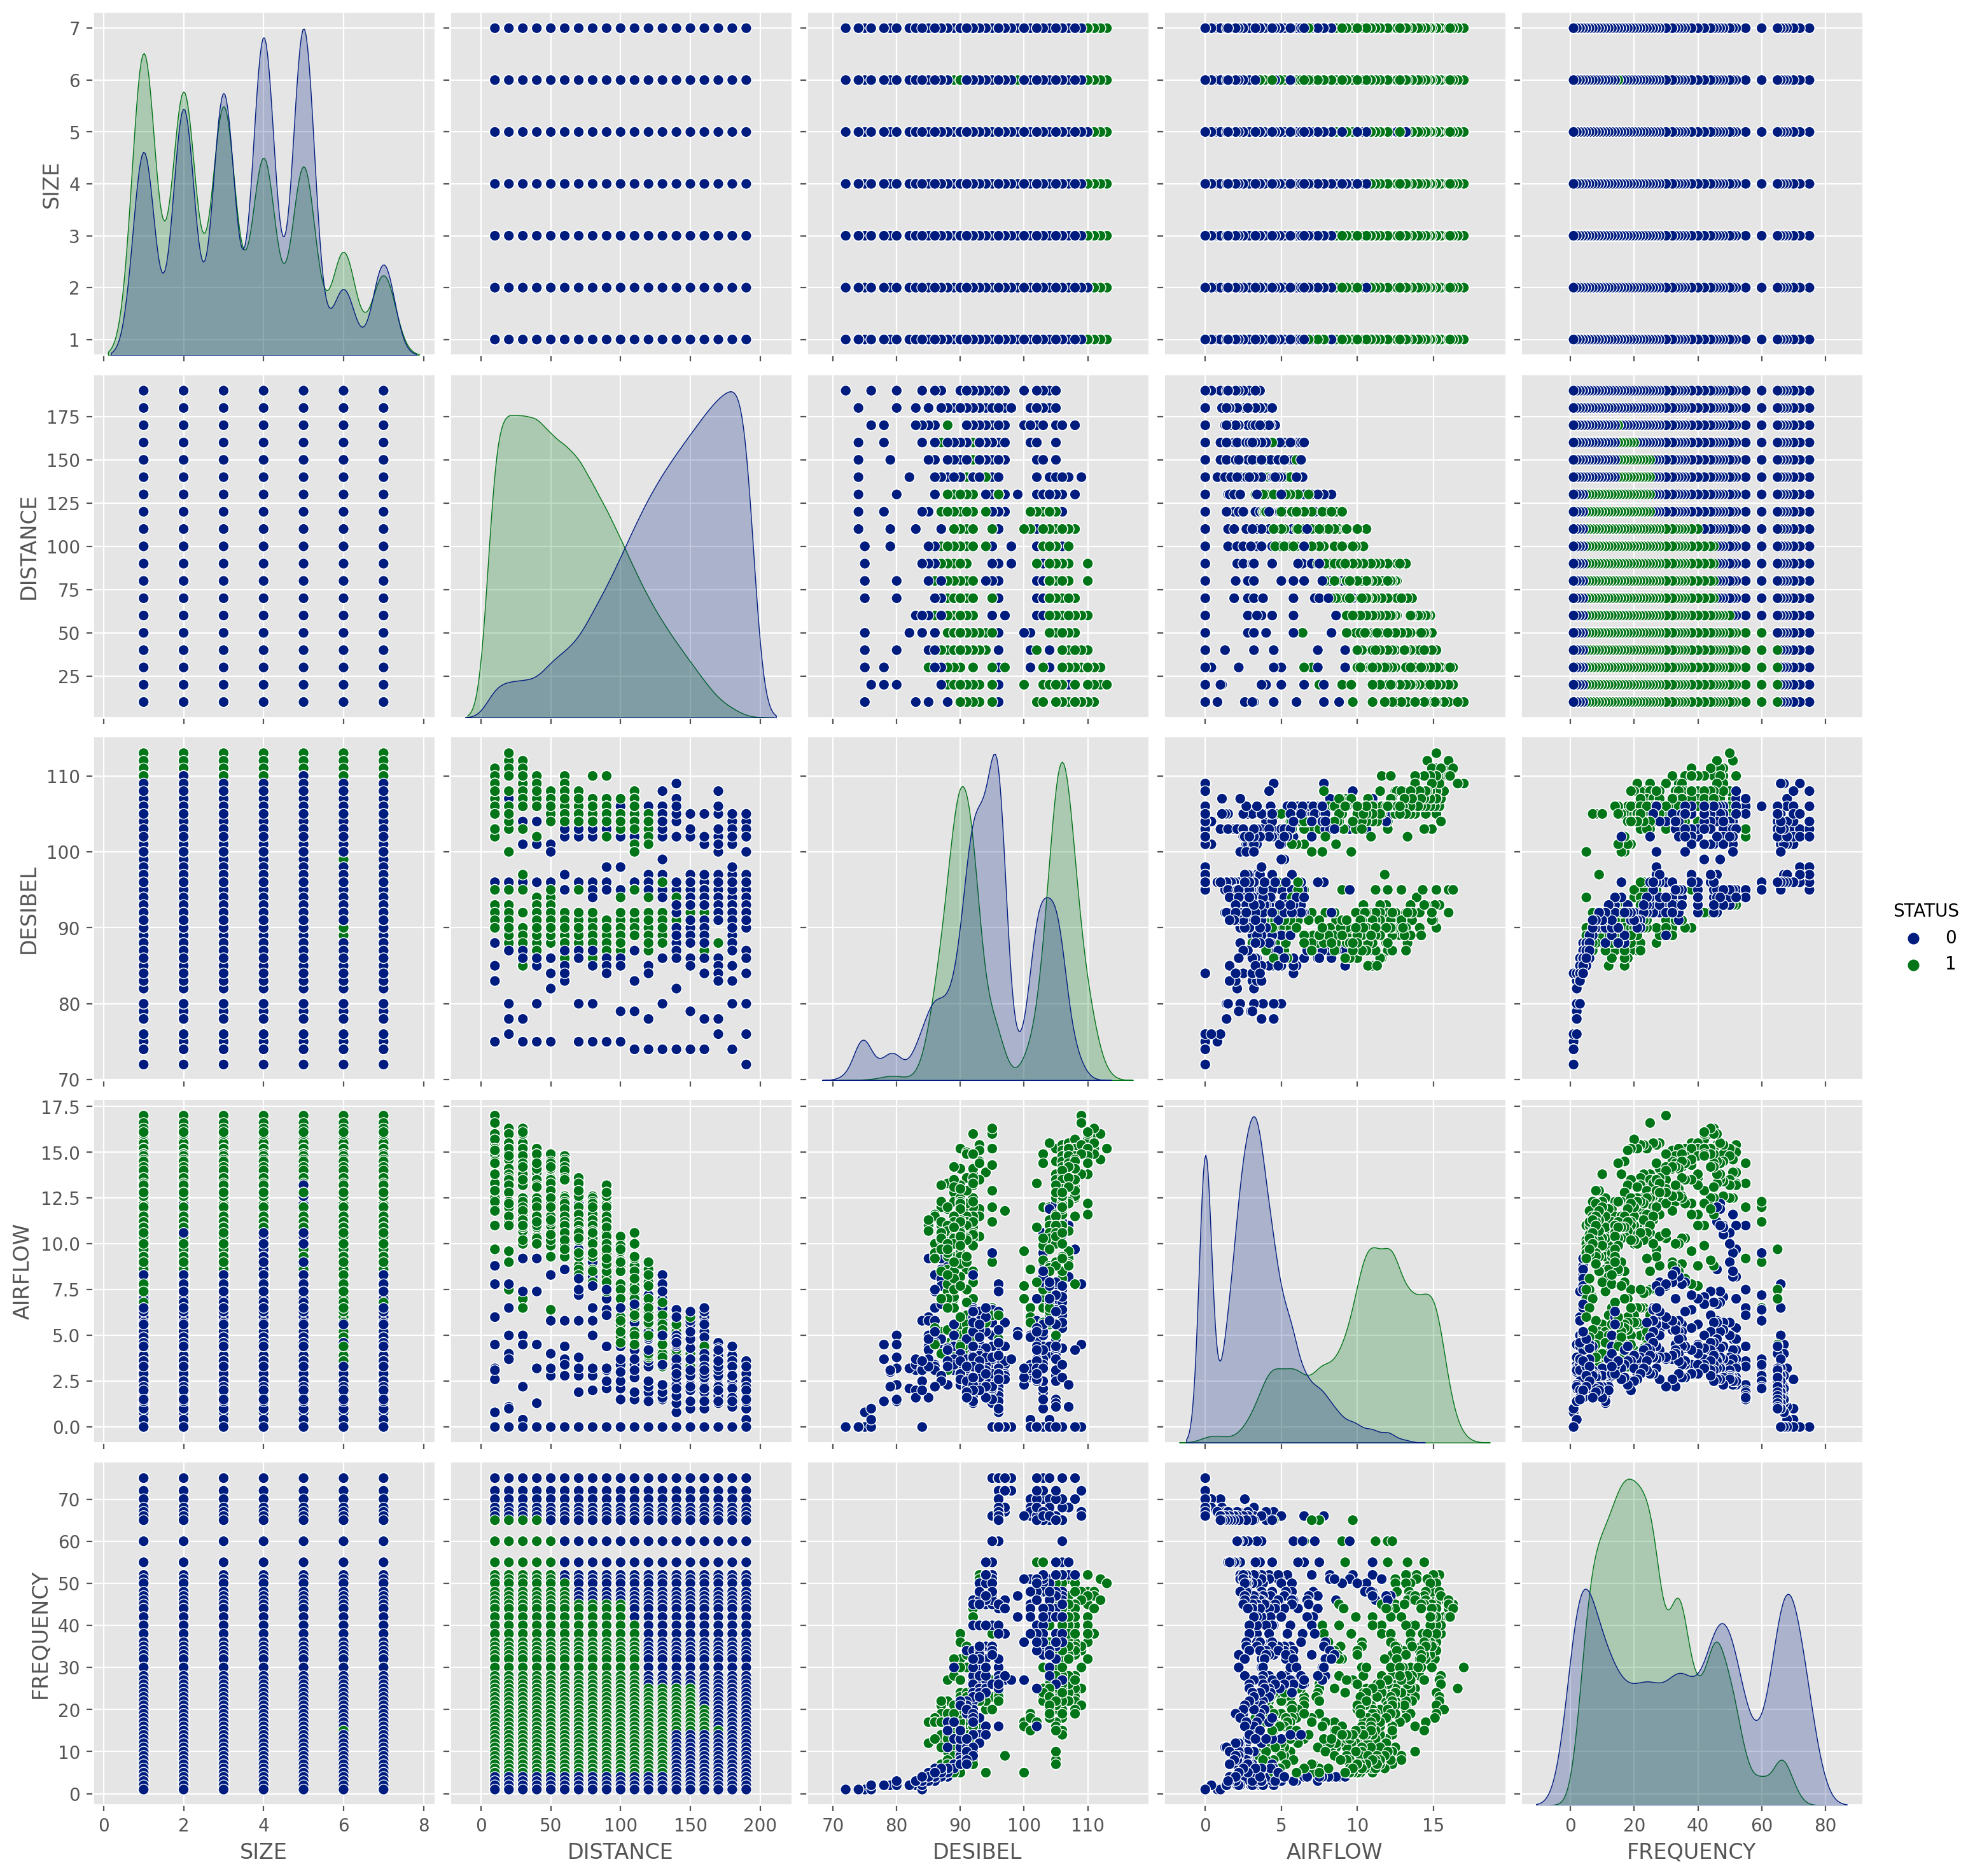

In [13]:
plt.style.use('seaborn-dark-palette')
sns.pairplot(df, hue='STATUS', height=3)
plt.show()

# Data Cleaning

**1. Analyze the numerical and categorical features, and convert categorical feature into numerical.**

In [14]:
df['FUEL'].unique()
df['FUEL'].value_counts()

array(['gasoline', 'thinner', 'kerosene', 'lpg'], dtype=object)

gasoline    5130
thinner     5130
kerosene    5130
lpg         2052
Name: FUEL, dtype: int64

In [15]:
# converting categorical column into numerical
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
df["FUEL"] = LE.fit_transform(df[["FUEL"]])

0 - Gasoline ; 1 - Kerosene ; 2 - LPG ; 3 - Thinner

In [16]:
df.tail()
df.head()

SIZE  FUEL  DISTANCE  DESIBEL  AIRFLOW  FREQUENCY  STATUS
17437     7     2       190       86      2.2          5       0
17438     7     2       190       84      2.0          4       0
17439     7     2       190       80      1.5          3       0
17440     7     2       190       76      0.4          2       0
17441     7     2       190       72      0.0          1       0

SIZE  FUEL  DISTANCE  DESIBEL  AIRFLOW  FREQUENCY  STATUS
0     1     0        10       96      0.0         75       0
1     1     0        10       96      0.0         72       1
2     1     0        10       96      2.6         70       1
3     1     0        10       96      3.2         68       1
4     1     0        10      109      4.5         67       1

**2. Check for missing values and handle them.**

In [17]:
df.isnull().sum()

SIZE         0
FUEL         0
DISTANCE     0
DESIBEL      0
AIRFLOW      0
FREQUENCY    0
STATUS       0
dtype: int64

**3.Check for duplicate values**

In [18]:
df.duplicated().value_counts()

False    17442
dtype: int64

**4.Check for outliers. If present try to handle them.**

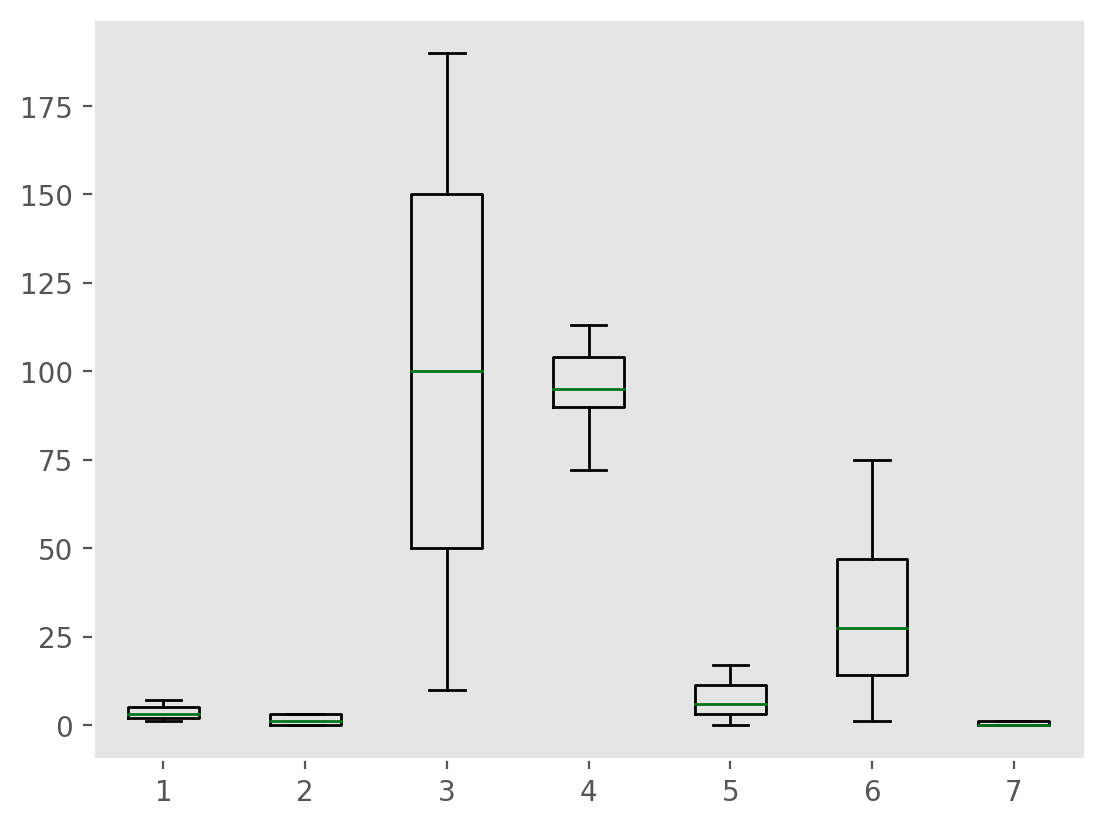

In [19]:
plt.boxplot(df)  
plt.grid(False)
plt.show();

In [20]:
df.skew()

SIZE         0.278724
FUEL         0.209609
DISTANCE     0.000000
DESIBEL     -0.179047
AIRFLOW      0.244368
FREQUENCY    0.434892
STATUS       0.008715
dtype: float64

In [21]:
# CORRELATION
correlation = df.corr()
correlation

SIZE          FUEL      DISTANCE       DESIBEL  \
SIZE       1.000000e+00  1.161420e-01 -2.437871e-15 -6.125585e-15   
FUEL       1.161420e-01  1.000000e+00 -5.956652e-16 -1.383383e-14   
DISTANCE  -2.437871e-15 -5.956652e-16  1.000000e+00 -2.385897e-01   
DESIBEL   -6.125585e-15 -1.383383e-14 -2.385897e-01  1.000000e+00   
AIRFLOW    1.677898e-16 -8.832434e-16 -7.074906e-01  3.769153e-01   
FREQUENCY  9.978281e-17 -1.081887e-15 -2.452947e-17  5.617409e-01   
STATUS    -9.694718e-02 -1.938442e-02 -6.440506e-01  2.039698e-01   

                AIRFLOW     FREQUENCY    STATUS  
SIZE       1.677898e-16  9.978281e-17 -0.096947  
FUEL      -8.832434e-16 -1.081887e-15 -0.019384  
DISTANCE  -7.074906e-01 -2.452947e-17 -0.644051  
DESIBEL    3.769153e-01  5.617409e-01  0.203970  
AIRFLOW    1.000000e+00 -2.120462e-01  0.760628  
FREQUENCY -2.120462e-01  1.000000e+00 -0.244203  
STATUS     7.606279e-01 -2.442030e-01  1.000000

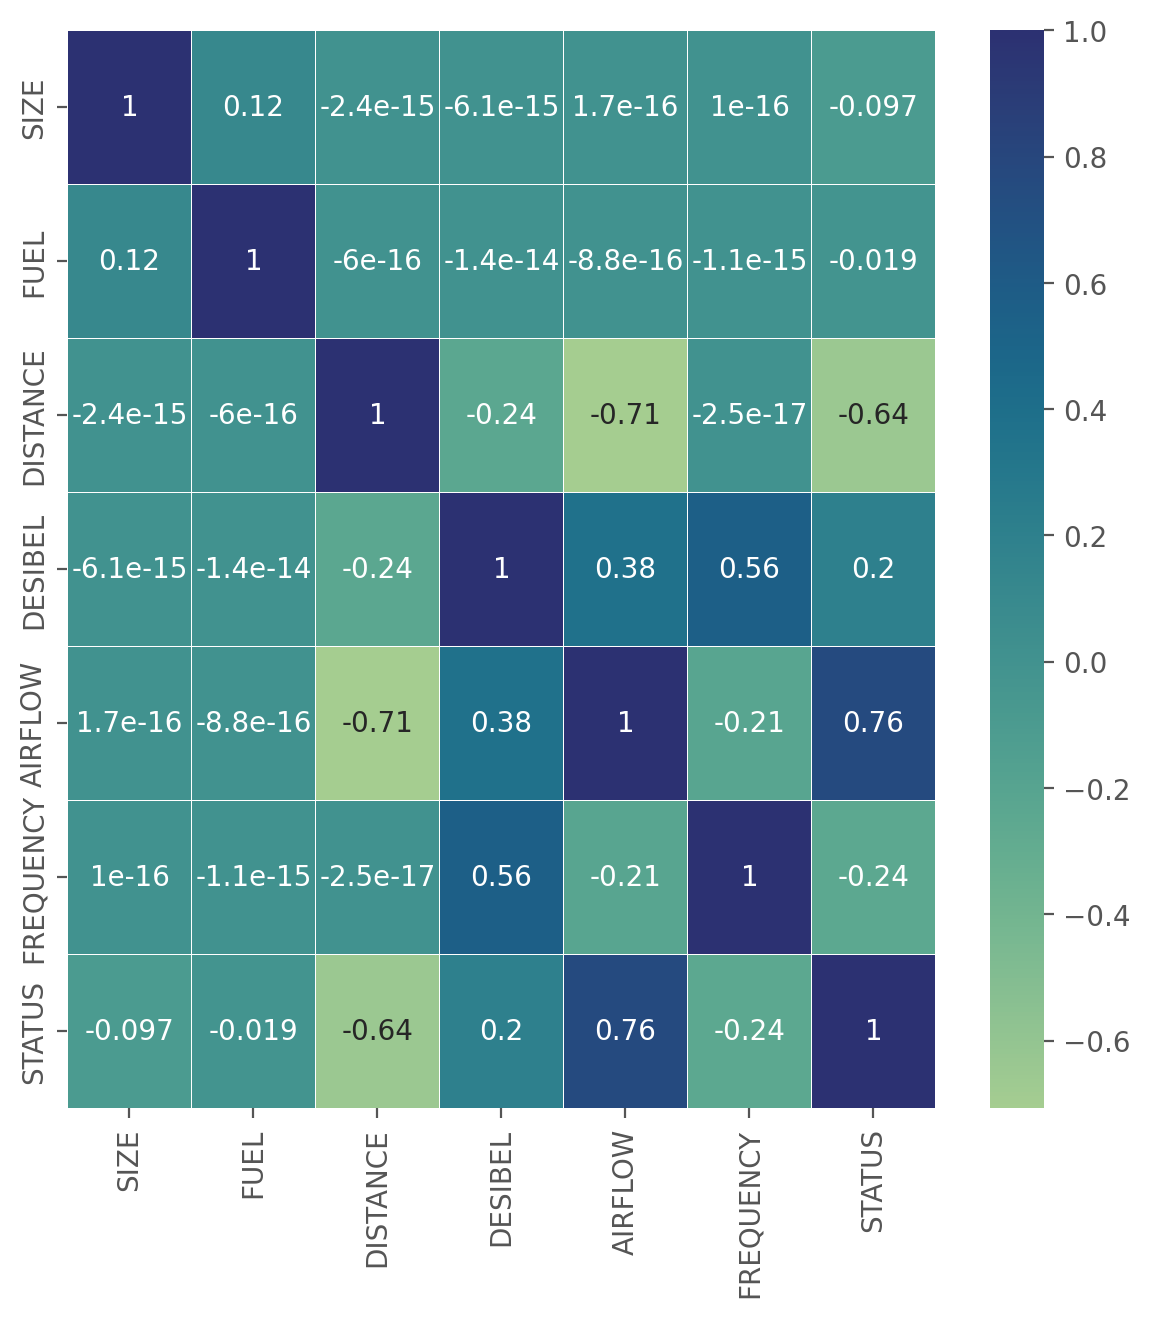

In [22]:
plt.figure(figsize=(7,7))
sns.heatmap(correlation,annot=True,cmap='crest',linewidths=0.2)
plt.show();

In [23]:
df.columns

Index(['SIZE', 'FUEL', 'DISTANCE', 'DESIBEL', 'AIRFLOW', 'FREQUENCY',
       'STATUS'],
      dtype='object')

In [24]:
import tensorflow
from tensorflow import keras
from keras.models import  Sequential
from keras.layers import Dense, Dropout,BatchNormalization
from keras.callbacks import EarlyStopping

In [39]:
call = EarlyStopping()

# performing train test split


In [40]:
X = df[['SIZE', 'FUEL', 'DISTANCE', 'DESIBEL', 'AIRFLOW', 'FREQUENCY']]
y = df['STATUS']

In [41]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2)

In [42]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
X_train_trans=std.fit_transform(X_train)

In [43]:
X_test_trans = std.transform(X_test)

In [97]:
#model = Sequential()


#model.add(Dense(12,activation='relu' , kernel_initializer = 'he_uniform', input_dim = 6 ))
#model.add(Dropout(0.2))
#model.add(Dense(10,activation='relu', kernel_initializer = 'he_uniform'))
#model.add(Dropout(0.2))
#model.add(Dense(9,activation='relu', kernel_initializer = 'he_uniform'))
#model.add(Dropout(0.2))
#model.add(Dense(8,activation='relu', kernel_initializer = 'he_uniform'))
#model.add(Dropout(0.2))
#model.add(Dense(7,activation='relu', kernel_initializer = 'he_uniform'))
#model.add(Dropout(0.2))
#model.add(Dense(6,activation='relu', kernel_initializer = 'he_uniform'))
#model.add(Dropout(0.2))
#model.add(Dense(4,activation='relu', kernel_initializer = 'he_uniform'))
#model.add(Dropout(0.2))
#model.add(Dense(3,activation='relu', kernel_initializer = 'he_uniform'))
#model.add(Dense(2,activation='relu', kernel_initializer = 'he_uniform'))
#model.add(Dense(1,activation='sigmoid', kernel_initializer = 'he_uniform'))

In [139]:
model = Sequential()


model.add(Dense(10,activation='relu' , input_dim = 6 ))
model.add(Dense(9,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(6,activation='relu'))
model.add(Dense(5,activation='relu'))
model.add(Dense(2,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

# Model Compilation and Training

In [140]:
model.compile(optimizer='Adam',loss = 'binary_crossentropy',metrics = ['accuracy'])

In [141]:
history = model.fit(X_train_trans,y_train,epochs =60 ,validation_split = 0.2,callbacks=call)

Epoch 1/60
349/349 [==============================] - 7s 7ms/step - loss: 0.4981 - accuracy: 0.8023 - val_loss: 0.4122 - val_accuracy: 0.8760
Epoch 2/60
349/349 [==============================] - 1s 3ms/step - loss: 0.3738 - accuracy: 0.8937 - val_loss: 0.3579 - val_accuracy: 0.8893
Epoch 3/60
349/349 [==============================] - 1s 3ms/step - loss: 0.3282 - accuracy: 0.9015 - val_loss: 0.3142 - val_accuracy: 0.8986
Epoch 4/60
349/349 [==============================] - 1s 3ms/step - loss: 0.2956 - accuracy: 0.9071 - val_loss: 0.2849 - val_accuracy: 0.9108
Epoch 5/60
349/349 [==============================] - 1s 3ms/step - loss: 0.2692 - accuracy: 0.9140 - val_loss: 0.2625 - val_accuracy: 0.9111
Epoch 6/60
349/349 [==============================] - 2s 4ms/step - loss: 0.2509 - accuracy: 0.9139 - val_loss: 0.2423 - val_accuracy: 0.9190
Epoch 7/60
349/349 [==============================] - 2s 4ms/step - loss: 0.2336 - accuracy: 0.9199 - val_loss: 0.2243 - val_accuracy: 0.9237
Epoch 

# MLP Evaluation and Plotting decision surfaces

In [142]:
Y_cap = model.predict(X_test_trans) 
Y_cap

110/110 [==============================] - 0s 1ms/step


array([[0.18271919],
       [0.9996208 ],
       [0.06212408],
       ...,
       [0.46504825],
       [0.74257374],
       [0.06212408]], dtype=float32)

In [143]:
Y_cap_f = np.where(Y_cap>0.5,1,0)

In [144]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,Y_cap_f)

0.9312123817712812

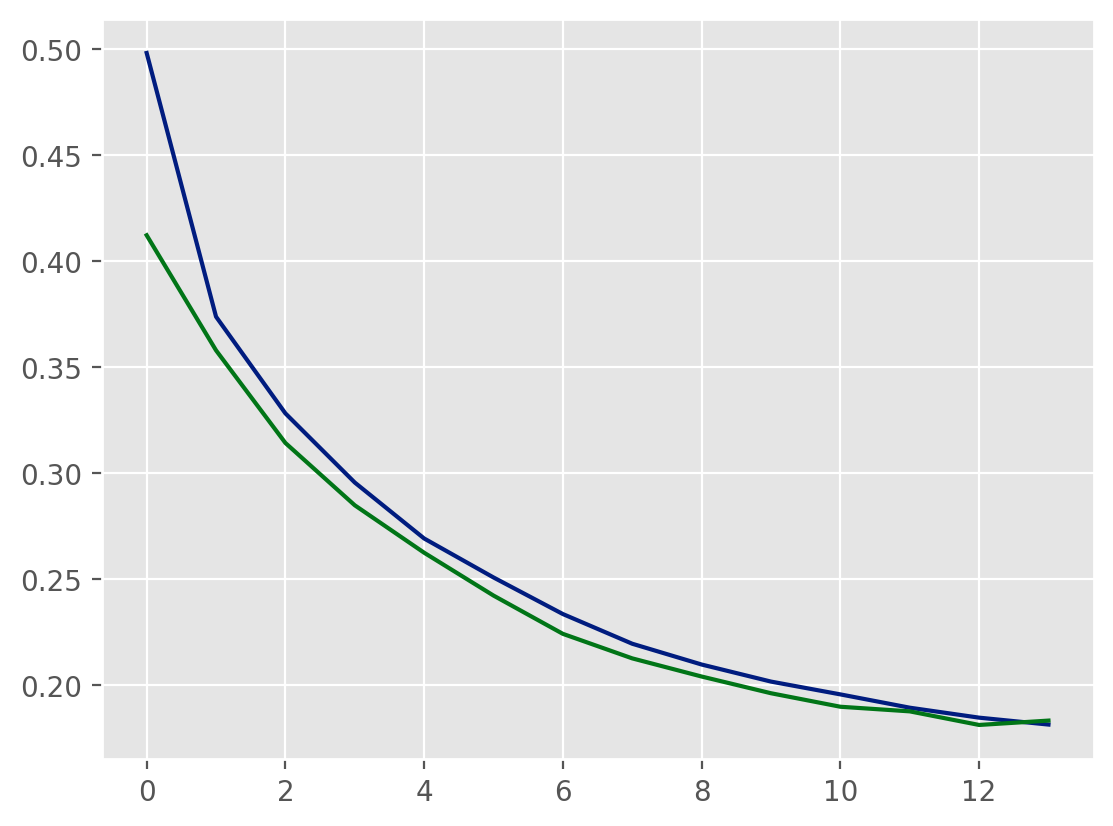

In [145]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss']);

In [89]:
#!pip install mlxtend --upgrade

In [53]:
#from mlxtend.plotting import plot_decision_regions

In [54]:
#plot_decision_regions(X_train_trans, y_train.values.astype(int), clf = model);

In [ ]:
#plot_decision_regions(X_test_trans, y_test.values.astype(int), clf = model);

**Conclusion:**
 - for this dataset one input layer with 6 features, five hidden layers and one output layer ,"relu" activation function in input and hidden layers and "Sigmoid" activation function in output layer is used.
 - optimizer is "Adam" , loss is "binary_crossentropy" and metric is "Accuracy" used.
 - For this model architecture got the accuracy score of 93%.
